# 1.1 (i) Write a program to create a variable with a size of 2x3 and a constant (2 marks)

In [1]:
import tensorflow as tf
import numpy as np

C:\Users\uma21\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
t1 = tf.constant([[1,2,3],[4,5,6]])
t1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

# (ii) Write a program to create a variable "tf3" with a size 3x3 and convert it to a numpy size of 3x3. Display rank of the matrix (2 marks)

In [3]:
tf3 = tf.constant([[1,3,8],[3,2,5],[3,5,7]])
print(tf3.numpy())
print(tf.rank(tf3))

[[1 3 8]
 [3 2 5]
 [3 5 7]]
tf.Tensor(2, shape=(), dtype=int32)


# (iii) Write a program to randomly generate 3x3 matrix and assign 0 to the first row first column element (1 mark)

In [4]:
# create a tensor of shape [4,3] and random values
tv3=tf.random.normal([3,3])
tv3

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.56201595, -0.6563087 ,  1.1038344 ],
       [-0.04154333,  0.58347934,  0.02630715],
       [-0.69830036,  1.4737124 ,  0.24177784]], dtype=float32)>

In [5]:
# converting the tensor to variable tensor to allow us to perform operations on it.
tv4=tf.Variable(tv3)

In [6]:
# change 1st element value to 0
tv4[0,0].assign(0)

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[ 0.        , -0.6563087 ,  1.1038344 ],
       [-0.04154333,  0.58347934,  0.02630715],
       [-0.69830036,  1.4737124 ,  0.24177784]], dtype=float32)>

# 1.2 (i). What is Cross Entropy? (2 marks)

---- the answer is mentioned in the report -----

# (ii). Write a program to create a variable "tensor" with a size 5x8 and reshape it to a size of 4x10 (3 marks)

In [7]:
# Create a variable with a size of 5x8
tensor = tf.Variable(tf.random.normal((5, 8)))
tensor

<tf.Variable 'Variable:0' shape=(5, 8) dtype=float32, numpy=
array([[ 0.706481  , -1.7663548 ,  0.7654823 , -1.6070663 ,  0.13956062,
        -1.118437  , -0.7287281 , -0.3132776 ],
       [ 0.44321975, -0.92267585,  0.07407688,  0.70991486, -0.6983372 ,
         0.23463318,  0.06480521,  0.57869375],
       [-1.0024983 , -0.23235057,  0.27816606, -1.8446363 ,  0.48552865,
        -1.9583853 ,  0.06612394, -0.2230692 ],
       [-1.4614706 , -0.41510555,  0.73571223,  0.85212034,  1.0275102 ,
        -3.0725203 ,  0.7038673 , -0.2793808 ],
       [-0.21908297,  1.8659177 ,  0.45279285, -2.160773  , -0.18010987,
        -0.04083947,  1.8995423 , -0.8371146 ]], dtype=float32)>

In [8]:
# Reshape the tensor to a size of 4x10
reshaped_tensor = tf.reshape(tensor, (4, 10))
reshaped_tensor

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[ 0.706481  , -1.7663548 ,  0.7654823 , -1.6070663 ,  0.13956062,
        -1.118437  , -0.7287281 , -0.3132776 ,  0.44321975, -0.92267585],
       [ 0.07407688,  0.70991486, -0.6983372 ,  0.23463318,  0.06480521,
         0.57869375, -1.0024983 , -0.23235057,  0.27816606, -1.8446363 ],
       [ 0.48552865, -1.9583853 ,  0.06612394, -0.2230692 , -1.4614706 ,
        -0.41510555,  0.73571223,  0.85212034,  1.0275102 , -3.0725203 ],
       [ 0.7038673 , -0.2793808 , -0.21908297,  1.8659177 ,  0.45279285,
        -2.160773  , -0.18010987, -0.04083947,  1.8995423 , -0.8371146 ]],
      dtype=float32)>

# 2.Questions on basic neural network model designing and compiling

# Dataset : 
The dataset has been attached to the assignment with two folders which consists of two objects i.e., dogs and wolves images. Please develop a CNN to identify the shapes as either dog or wolf. The task has been categorized into binary classification


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from keras.preprocessing import image
from sklearn.metrics import accuracy_score

In [10]:
train_dir =r"C:\Users\uma21\OneDrive\Desktop\DL-MiniProject\Dataset-20231006T064832Z-001\Dataset\Train"
test_dir = r"C:\Users\uma21\OneDrive\Desktop\DL-MiniProject\Dataset-20231006T064832Z-001\Dataset\Valid"

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for normalization and grayscale conversion
train_datagen = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.image.rgb_to_grayscale)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 940 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
from tensorflow.keras import optimizers
# Compiling the CNN
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [15]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,
                              epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

Epoch 1/10


C:\Users\uma21\AppData\Local\Temp\ipykernel_29224\4050372006.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,


47/47 [==============================] - 55s 1s/step - loss: 1.0738 - accuracy: 0.4926 - val_loss: 0.6627 - val_accuracy: 0.6500
Epoch 2/10
47/47 [==============================] - 53s 1s/step - loss: 0.7092 - accuracy: 0.4979 - val_loss: 0.6949 - val_accuracy: 0.4000
Epoch 3/10
47/47 [==============================] - 55s 1s/step - loss: 0.7033 - accuracy: 0.5085 - val_loss: 0.6909 - val_accuracy: 0.6500
Epoch 4/10
47/47 [==============================] - 55s 1s/step - loss: 0.6992 - accuracy: 0.5223 - val_loss: 0.7056 - val_accuracy: 0.4000
Epoch 5/10
47/47 [==============================] - 55s 1s/step - loss: 0.6969 - accuracy: 0.5681 - val_loss: 0.6428 - val_accuracy: 0.6667
Epoch 6/10
47/47 [==============================] - 74s 2s/step - loss: 0.6681 - accuracy: 0.6181 - val_loss: 0.7084 - val_accuracy: 0.5333
Epoch 7/10
47/47 [==============================] - 55s 1s/step - loss: 0.6315 - accuracy: 0.6511 - val_loss: 0.6337 - val_accuracy: 0.6500
Epoch 8/10
47/47 [=============

# 2.1 Print shape of the data and understand how many images of different classes exist in this dataset. Visualize some images using matplotlib.Convert the RGB Image to Grayscale ( For easier computation) . Normalize the data so that data is in range 0-1.Reshape train and test images into one dimensional vector

In [16]:
# Print the shape of the data
print("Shape of Image Data:", train_generator.image_shape)
print("Number of Classes:", train_generator.num_classes)

Shape of Image Data: (224, 224, 3)
Number of Classes: 2


In [17]:
# Print the number of images in each class
class_counts = train_generator.classes
unique_classes = set(class_counts)
for cls in unique_classes:
    print(f"Number of images in class {cls}: {class_counts.tolist().count(cls)}")

Number of images in class 0: 470
Number of images in class 1: 470


In [18]:
# Visualize images
def visualize_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = ['Dog' if label == 0 else 'Wolf' for label in labels]

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[i])
        plt.axis('off')
    plt.show()

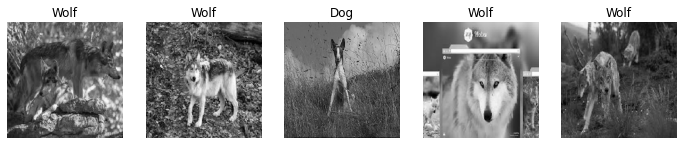

In [19]:
# Visualize training images
visualize_images(train_generator)

In [25]:
# Reshape images into one-dimensional vectors
img_array = np.array(test_image)
X_flat = img_array.reshape(img_array.shape[0], -1)

# 2.2 Construct the Deep Neural Network to classify the 2 classes of images available in the dataset. 
Compile and fit the model (No restrictions on CNN architecture. Feel free to explore and optimize.) Compute the performance accuracy of the model created. 


1/1 [==============================] - 0s 276ms/step
dog
Model prediction = dog


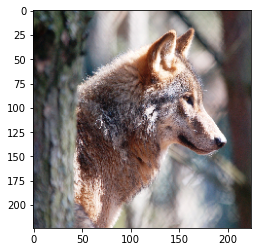

In [23]:
test_image = image.load_img(r"C:\Users\uma21\OneDrive\Desktop\DL-MiniProject\Dataset-20231006T064832Z-001\Dataset\Valid\wolves\Img-4887.jpg", target_size = (224, 224))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
    print('dog')
else:
    prediction = 'wolf'
print(f"Model prediction = {prediction}")